# Demo Notebook

This notebook aims to represent the DeepLabCut output analysis, using example data. 
So we begin by importing our packages, called for now "dlc". 

In [1]:
import dlc

#### Loading data
As an example, we will first work on a single file. Later, we'll try batch processing. We define the path where our file is, and with the function
`dlc.load_data.read_data` we will load our `.h5` file. 

In [2]:
h5_path =  '/Users/annateruel/ca2+img-anna-2023-01-30/videos'
data = dlc.load_data.read_data( '/Users/annateruel/ca2+img-anna-2023-01-30/videos/0_neutro2DLC_resnet50_ca2+imgJan30shuffle1_500000.h5', 5, 30)

Since on this data file we have performed a tracking on the cage, we will define a list of bodyparts we want to work with. 

In [3]:
bodyparts = ['nose', 'rightear', 'leftear', 'head', 'sp1', 'sp2', 'tail']

In [13]:
df2 = data.copy()

#### Get centroid from a list of bodyparts

One of the functions we can perform from the `data.py` file is to calculate the centroid of specified bodyparts in each dataframe. We can add this centroid coordinates (x,y) to our current dataframe. Let's try that!

#### Calculate interpolation

If the tracking of some bodyparts is not perfect, we can get the interpolation of those values with likelihood under a certain threshold. 

In [ ]:
df2 = data.copy() #we get a copy of the dataframe and work from there
df2 = dlc.data.get_interpolation()

In [ ]:
DLCscorer = df2.columns[0][0]
threshold = 0.95
likelihood_col = (DLCscorer, 'nose', 'likelihood')
if df2[likelihood_col].lt(threshold).any():
    mask = df2[likelihood_col] < threshold

    df2.loc[mask, (DLCscorer, 'nose', 'x')] = np.nan
    df2.loc[mask, (DLCscorer, 'nose', 'y')] = np.nan

    df2[(DLCscorer, 'nose', 'x')] = df2[(DLCscorer, 'nose', 'x')].interpolate(method='linear')
    df2[(DLCscorer, 'nose', 'y')] = df2[(DLCscorer, 'nose', 'y')].interpolate(method='linear')

nose2 = df2.loc[:,(DLCscorer, 'nose', slice(None))]
nose2

In [3]:
nose = data.loc[:, (slice(None), 'nose', slice(None))]
nose.loc[:,(slice(None), slice(None), 'x')]

scorer,DLC_resnet50_ca2+imgJan30shuffle1_500000
bodyparts,nose
coords,x
0,527.124634
1,526.650269
2,527.668457
3,527.806580
4,527.867065
...,...
995,304.320038
996,304.502136


/Users/annateruel/phd_code/dlc/plotting.py:81: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(


NameError: name 'plt' is not defined

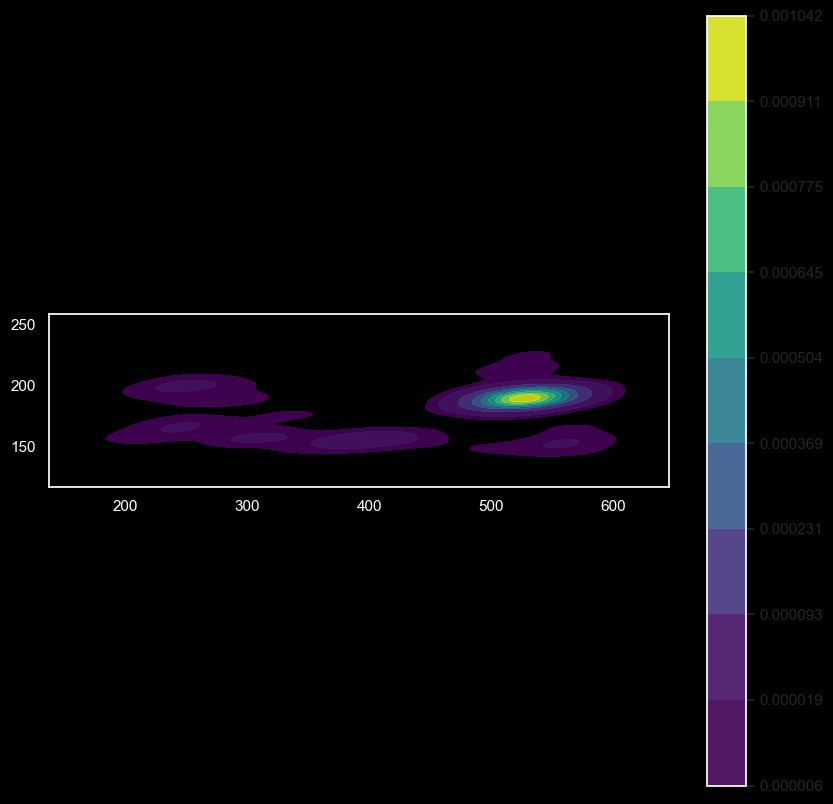

In [5]:
dlc.plotting.density_plot(bodypart=nose, style='dark')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

fig, ax = plt.subplots(figsize=(10, 10))

x = nose.loc[:, (slice(None), slice(None), 'x')].values
y = nose.loc[:, (slice(None), slice(None), 'y')].values
likelihood = nose.loc[:, (slice(None), slice(None), 'likelihood')].values.flatten()  # Flatten the array

# Create segments for LineCollection
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Create a LineCollection object with segments and colormap
colormap = plt.cm.RdYlGn
lc = LineCollection(segments, cmap=colormap, norm=plt.Normalize(likelihood.min(), likelihood.max()), linewidth=0.5, alpha=0.5)
lc.set_array(likelihood)

ax.add_collection(lc)

# Add a colorbar to the plot to show what each color represents
cbar = plt.colorbar(lc, ax=ax)
cbar.set_label('Likelihood Value')

ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())

plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

def plot_data(ax, data, title):
    x = data.loc[:, (slice(None), slice(None), 'x')].values
    y = data.loc[:, (slice(None), slice(None), 'y')].values
    likelihood = data.loc[:, (slice(None), slice(None), 'likelihood')].values.flatten()

    # Create segments for LineCollection
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # Create a LineCollection object with segments and colormap
    colormap = plt.cm.RdYlGn
    lc = LineCollection(segments, cmap=colormap, norm=plt.Normalize(likelihood.min(), likelihood.max()), linewidth=0.5, alpha=0.5)
    lc.set_array(likelihood)

    ax.add_collection(lc)
    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(y.min(), y.max())
    ax.set_title(title)
    
    return lc

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

lc1 = plot_data(ax1, nose, "Before Interpolation")
lc2 = plot_data(ax2, nose2, "After Interpolation")

cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(lc2, cax=cbar_ax)
cbar.set_label('Likelihood Value')

plt.tight_layout()
plt.show()


In [14]:
nose = dlc.data.get_interpolation(df2, bodyparts)

AttributeError: 'Series' object has no attribute 'columns'

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
lc1 = plot_data(ax1, nose, "Before Interpolation")
lc2 = plot_data(ax2, nose2, "After Interpolation")

In [7]:
from dlc.analysis.time_roi import ROIDrawer
import pandas as pd

In [9]:
video_path = '/Users/annateruel/Desktop/0_test.avi'
out_dir = '/Users/annateruel/coord_poly.h5'
roi_drawer = ROIDrawer(video_path, save_dir = out_dir, num_rois=2)
r = roi_drawer.draw_rois()
r

Button clicked, processing ROIs...
ROI DataFrame assigned:    index shape-type  vertex-index      axis-0      axis-1
0      0     direct             0  133.240947  125.909605
1      0     direct             1  133.240947  300.269954
2      0     direct             2  471.902394  309.490934
3      0     direct             3  464.357956  102.857155
ROI DataFrame saved to: /Users/annateruel/coord_poly.h5


In [6]:
r = pd.read_hdf('/Users/annateruel/coord_poly.h5')
r

,index,shape-type,vertex-index,axis-0,axis-1
0,0,add_ellipse,0,118.413496,154.689339
1,0,add_ellipse,1,118.413496,278.667848
2,0,add_ellipse,2,234.845488,278.667848
3,0,add_ellipse,3,234.845488,154.689339
4,1,add_ellipse,0,340.496739,129.893637
5,1,add_ellipse,1,340.496739,279.745922
6,1,add_ellipse,2,460.162952,279.745922
7,1,add_ellipse,3,460.162952,129.893637


In [ ]:
# Example usage:
time_in_roi = TimeInROI()
time_in_roi.add_roi('ellipse', ((1, 1), (1, 2)))
print(time_in_roi.is_point_inside_roi((1, 2), 0))  # True for ellipse

time_in_roi.add_roi('polygon', [(0, 0), (0, 2), (2, 2), (2, 0)])
print(time_in_roi.is_point_inside_roi((1, 1), 1))  # True for polygon

time_in_roi.add_roi('rectangle', [(0, 0), (2, 2)])
print(time_in_roi.is_point_inside_roi((1, 1), 2))  # True for rectangle
